## 데이터셋 준비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import files
myfile = files.upload()

Saving 리뷰 데이터 최종.xlsx to 리뷰 데이터 최종.xlsx


In [ ]:
from google.colab import files
myfile = files.upload()

Saving korean_stopword.csv to korean_stopword.csv


In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy
!pip3 install JPype1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net

In [ ]:
# !git clone https://github.com/lovit/customized_konlpy.git
# !pip install customized-KoNLPy

In [ ]:
import konlpy
konlpy.data.path

['/root/konlpy_data',
 '/usr/share/konlpy_data',
 '/usr/local/share/konlpy_data',
 '/usr/lib/konlpy_data',
 '/usr/local/lib/konlpy_data',
 '/usr/local/lib/python3.7/dist-packages/konlpy/data']

In [ ]:
# automake 설치
os.chdir('/tmp')
!curl -LO http://ftpmirror.gnu.org/automake/automake-1.11.tar.gz
!tar -zxvf automake-1.11.tar.gz
os.chdir('/tmp/automake-1.11')
!./configure
!make
!make install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1339k  100 1339k    0     0  2243k      0 --:--:-- --:--:-- --:--:-- 5478k
automake-1.11/
automake-1.11/THANKS
automake-1.11/ChangeLog.03
automake-1.11/automake.in
automake-1.11/ChangeLog.96
automake-1.11/ChangeLog.98
automake-1.11/m4/
automake-1.11/m4/gcj.m4
automake-1.11/m4/missing.m4
automake-1.11/m4/runlog.m4
automake-1.11/m4/lex.m4
automake-1.11/m4/vala.m4
automake-1.11/m4/obsol-gt.m4
automake-1.11/m4/obsol-lt.m4
automake-1.11/m4/minuso.m4
automake-1.11/m4/ccstdc.m4
automake-1.11/m4/install-sh.m4
automake-1.11/m4/upc.m4
automake-1.11/m4/sanity.m4
automake-1.11/m4/amversion.m4
automake-1.11/m4/make.m4
automake-1.11/m4/auxdir.m4
automake-1.11/m4/options.m4
automake-1.11/m4/lispdir.m4
automake-1.11/m4/Makefile.am
automake-1.11/m4/dirlist
automake-

In [ ]:
# mecab-ko 설치
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1380k  100 1380k    0     0  2181k      0 --:--:-- --:--:-- --:--:-- 24.1M
mecab-0.996-ko-0.9.1/
mecab-0.996-ko-0.9.1/config.h.in
mecab-0.996-ko-0.9.1/Makefile.train
mecab-0.996-ko-0.9.1/ChangeLog
mecab-0.996-ko-0.9.1/configure
mecab-0.996-ko-0.9.1/swig/
mecab-0.996-ko-0.9.1/swig/version.h.in
mecab-0.996-ko-0.9.1/swig/Makefile
mecab-0.996-ko-0.9.1/swig/version.h
mecab-0.996-ko-0.9.1/swig/MeCab.i
mecab-0.996-ko-0.9.1/mkinstalldirs
mecab-0.996-ko-0.9.1/mecab-config.in
mecab-0.996-ko-0.9.1/configure.in
mecab-0.996-ko-0.9.1/mecab.iss.in
mecab-0.996-ko-0.9.1/aclocal.m4
mecab-0.996-ko-0.9.1/mecabrc.in
mecab-0.996-ko-0.9.1/INSTALL
mecab-0.996-ko-0.9.1/AUTHORS
mecab-0.996-ko-0.9.1/example/
mecab-0.996-ko-0.9.1/example/example_lattice.c
mecab-0.996-ko-0.9.1/

In [ ]:
# mecab-ko-dic 설치
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 46.3M  100 46.3M    0     0  46.8M      0 --:--:-- --:--:-- --:--:-- 46.8M
mecab-ko-dic-2.0.1-20150920/
mecab-ko-dic-2.0.1-20150920/configure.ac
mecab-ko-dic-2.0.1-20150920/Person-actor.csv
mecab-ko-dic-2.0.1-20150920/IC.csv
mecab-ko-dic-2.0.1-20150920/model.def
mecab-ko-dic-2.0.1-20150920/user-dic/
mecab-ko-dic-2.0.1-20150920/user-dic/place.csv
mecab-ko-dic-2.0.1-20150920/user-dic/README.md
mecab-ko-dic-2.0.1-20150920/user-dic/person.csv
mecab-ko-dic-2.0.1-20150920/user-dic/nnp.csv
mecab-ko-dic-2.0.1-20150920/Place.csv
mecab-ko-dic-2.0.1-20150920/rewrite.def
mecab-ko-dic-2.0.1-20150920/tools/
mecab-ko-dic-2.0.1-20150920/tools/add-userdic.sh
mecab-ko-dic-2.0.1-20150920/tools/mecab-bestn.sh
mecab-ko-dic-2.0.1-20150920/tools/convert_for_using_store.sh

In [ ]:
# mecab-python 설치: python3 기준
os.chdir('/content')
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')
!python3 setup.py build
!python3 setup.py install

Cloning into 'mecab-python-0.996'...
Unpacking objects: 100% (17/17), done.
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
copying MeCab.py -> build/lib.linux-x86_64-3.7
running build_ext
building '_MeCab' extension
creating build/temp.linux-x86_64-3.7
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/include -I/usr/include/python3.7m -c MeCab_wrap.cxx -o build/temp.linux-x86_64-3.7/MeCab_wrap.o
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 -Wl,-Bsymbolic-functions -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.7/MeCab_wrap.o -L/usr/local/lib -lmecab -lstdc++ -o build/lib.li

## 사전에 단어 추가하기

In [ ]:
os.chdir('/usr/local/lib/python3.7/dist-packages/konlpy/java')
os.getcwd() 
os.makedirs('./new_dic')

In [ ]:
#현재 경로 확인
os.getcwd()
os.chdir('/usr/local/lib/python3.7/dist-packages/konlpy/java/new_dic')

In [ ]:
# new_dic 폴더에 okt 사전 압축 파일 풀기
!jar xvf ../open-korean-text-2.1.0.jar

  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/processor/util/freq/
  created: org/openkoreantext/processor/util/josa/
  created: org/openkoreantext/processor/util/noun/
  created: org/openkoreantext/processor/util/substantives/
  created: org/openkoreantext/processor/util/typos/
  created: org/openkoreantext/processor/util/verb/
 inflated: org/openkoreantext/pr

In [ ]:
# 원하는 품사의 파일을 열어 사용자 사전에 추가
with open(f"/usr/local/lib/python3.7/dist-packages/konlpy/java/new_dic/org/openkoreantext/processor/util/noun/company_names.txt") as f:
  data = f.read()

In [ ]:
# 새로운 단어 추가
data += '샤오미\n화웨이\n애플\n소니\n레노버\n한성'

# 파일 새롭게 저장
with open("/usr/local/lib/python3.7/dist-packages/konlpy/java/new_dic/org/openkoreantext/processor/util/noun/company_names.txt", 'w') as f:
    f.write(data)

In [ ]:
# 원하는 품사의 파일을 열어 사용자 사전에 추가
with open(f"/usr/local/lib/python3.7/dist-packages/konlpy/java/new_dic/org/openkoreantext/processor/util/noun/nouns.txt") as f:
  data = f.read()

In [ ]:
# 새로운 단어 추가
data += '아이폰\n아이패드\n홍미노트\n갤럭시\n갤럭시울트라\n갤럭시핏\n노치\n가성비\n갓성비\n노캔\n노이즈캔슬링\n에어팟\n에어팟프로\n버즈프로\n갤탭\n갤럭시\n플립\n폴더블\n힌지\n프로맥스\n패키징\n태블릿\n패드\n맥북\n미밴드\n이어팁\n와파\n와이파이\n셔터\n스펙\n펀치홀\n프맥\n울트라\n커널\n이어폰\n엣지\n망작\n카툭튀\n베젤\n정발\n포코\n삼성페이\n삼페\n애플페이\n라이트닝\n페이스아이디\n터치아이디\n다크모드\n역체감\n보케\n시네마틱\n비스포크\n글라스틱\n번인\n스냅드래곤\n인덕션\n환공포증\n팀쿡'

# 파일 새롭게 저장
with open("/usr/local/lib/python3.7/dist-packages/konlpy/java/new_dic/org/openkoreantext/processor/util/noun/nouns.txt", 'w') as f:
    f.write(data)

In [ ]:
# 원하는 품사의 파일을 열어 사용자 사전에 추가
with open(f"/usr/local/lib/python3.7/dist-packages/konlpy/java/new_dic/org/openkoreantext/processor/util/noun/slangs.txt") as f:
  data = f.read()

In [ ]:
# 새로운 단어 추가
data += '킹받네\n존버\n갬성\n갬승\n창렬\n혜자\n존나\n졸라\n뇌절\n뇌이징\n앱등이\n삼엽충\n애플빠\n뽐뿌\n광탈\n케바케\n개추\n노답\n떡상\n떡락\n띵작\n넘사\n믿거\n할말하않\n강추\n비추\n정뚝떨\n호갱\n망성비\n손절\n에바\n개에바\n원픽\n호불호'

# 파일 새롭게 저장
with open("/usr/local/lib/python3.7/dist-packages/konlpy/java/new_dic/org/openkoreantext/processor/util/noun/slangs.txt", 'w') as f:
    f.write(data)

In [ ]:
# 원하는 품사의 파일을 열어 사용자 사전에 추가
with open(f"/usr/local/lib/python3.7/dist-packages/konlpy/java/new_dic/org/openkoreantext/processor/util/josa/josa.txt") as f:
  data = f.read()

In [ ]:
# 새로운 단어 추가
data += '는데\n은데\n한데\n긴한데\n음\n슴\n셈\n때메\n땜에\n니까\n지만'

# 파일 새롭게 저장
with open("/usr/local/lib/python3.7/dist-packages/konlpy/java/new_dic/org/openkoreantext/processor/util/josa/josa.txt", 'w') as f:
    f.write(data)

In [ ]:
#재압축해주기
os.chdir('/usr/local/lib/python3.7/dist-packages/konlpy/java')
!jar cvf ../open-korean-text-2.1.0.jar *

added manifest
adding: aho-corasick.jar(in = 79138) (out= 76068)(deflated 3%)
adding: bin/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkma/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkma/KkmaInterface$3.class(in = 469) (out= 312)(deflated 33%)
adding: bin/kr/lucypark/kkma/KkmaInterface$1.class(in = 453) (out= 297)(deflated 34%)
adding: bin/kr/lucypark/kkma/KkmaInterface$2.class(in = 455) (out= 291)(deflated 36%)
adding: bin/kr/lucypark/kkma/KkmaInterface$4.class(in = 471) (out= 305)(deflated 35%)
adding: bin/kr/lucypark/kkma/KkmaInterface.class(in = 2762) (out= 1476)(deflated 46%)
adding: bin/kr/lucypark/jhannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/WorkflowFactory.class(in = 2931) (out= 1095)(deflated 62%)
adding: bin/kr/lucypark/jhannanum/comm/(in = 0) (out= 0)(st

## 데이터 전처리

In [ ]:
os.getcwd()
os.chdir('/content/')

In [ ]:
import pandas as pd
data_df = pd.read_excel('/content/리뷰 데이터 최종.xlsx') 
data_df = data_df[['label','comment']]
data_df = data_df.dropna()
data_df

,label,comment
0,0,메종키츠네 테마 폴드3에서는 적용 불가네요;;; 제일 비싼 라인업에서 사용 불가라니...
1,1,진짜 너무 이쁘다
2,1,아 너무 예쁘당
3,1,"솔직히 이거는 돈 하나도 안아까울듯 브랜드 이미지만 있어도 충분히 감성적일텐데, ..."
4,1,진짜 너무 예쁘네요ㅠㅠ 워치랑 버즈도 이쁜데 폰 테마 진짜 대박. 너무 이뻐요.
...,...,...
34176,0,휴대폰이 휴대성이 떨어짐. 무겁고 크고
34177,0,개비싸다 끝
34178,2,스펙만 보면 사고싶지만 디자인과 특히 색깔....이 구려요.. 그레이 대체;;
34179,0,매력이 없음. s10 때는 펀치홀에 온스크린 지문인식이 센세이션이엇는데 s20은 카...


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34181 entries, 0 to 34180
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    34181 non-null  int64 
 1   comment  34181 non-null  object
dtypes: int64(1), object(1)
memory usage: 801.1+ KB


In [ ]:
data_df['label'] = data_df['label'].astype('int')

In [ ]:
len(data_df['comment'].unique())

34172

In [ ]:
len(data_df['label'].unique())

3

In [ ]:
# 고유값만 남기고 중복 제거
data_df.drop_duplicates(['comment'],inplace=True)

In [ ]:
len(data_df)

34172

In [ ]:
# data_df = {"label" : data_df['label'], "comment" : data_df['comment']}
# youtube_pd = pd.DataFrame(data_df)

# youtube_pd.to_excel('0930_result.xlsx')

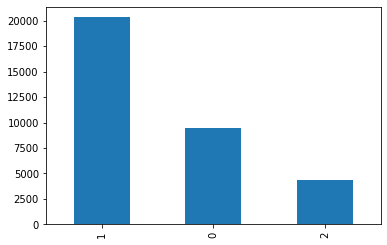

In [ ]:
data_df['label'].value_counts().plot(kind = 'bar')

In [ ]:
# print(data_df.isnull().values.any())

In [ ]:
# 정규 표현으로 바꾸기
import re
data_df['comment'] = data_df['comment'].str.replace('[^a-zA-Zㄱ-ㅣ가-힣0-9 ]','',regex=True)

In [ ]:
# 정규 표현으로 바꾸고 값이 사라진 행 있는지 확인
data_df.isnull().sum()

label      0
comment    0
dtype: int64

In [ ]:
data_df

,label,comment
0,0,메종키츠네 테마 폴드3에서는 적용 불가네요 제일 비싼 라인업에서 사용 불가라니 당황스럽네
1,1,진짜 너무 이쁘다
2,1,아 너무 예쁘당
3,1,솔직히 이거는 돈 하나도 안아까울듯 브랜드 이미지만 있어도 충분히 감성적일텐데 디...
4,1,진짜 너무 예쁘네요ㅠㅠ 워치랑 버즈도 이쁜데 폰 테마 진짜 대박 너무 이뻐요
...,...,...
34176,0,휴대폰이 휴대성이 떨어짐 무겁고 크고
34177,0,개비싸다 끝
34178,2,스펙만 보면 사고싶지만 디자인과 특히 색깔이 구려요 그레이 대체
34179,0,매력이 없음 s10 때는 펀치홀에 온스크린 지문인식이 센세이션이엇는데 s20은 카메...


## 토큰화하기

In [ ]:
k_stopword = pd.read_csv('/content/korean_stopword.csv')
# list(): 
stopword = list(k_stopword['불용어'])+['을','은','를','이가','과','의',
                                    '는','에','가','이','들','좀','잘',
                                    '걍','도','으로','자','와',
                                    '한','하다','있다','되다','에서']
stopword[:10]

['이', '있', '하', '것', '들', '그', '되', '수', '이', '보']

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
#토큰화 진행
morphs_lst = []
for i in data_df.index:
    #morphs = []
    morphs = ""
    morph = okt.morphs(data_df.loc[i]['comment'], stem=True)
    for txt in morph:
      if txt not in stopword:
        #morphs.append(txt)
        morphs = morphs + " " + txt
    morphs_lst.append(morphs)
data_df['morphs'] = morphs_lst
data_df.head()

,label,comment,morphs
0,0,메종키츠네 테마 폴드3에서는 적용 불가네요 제일 비싼 라인업에서 사용 불가라니 당황스럽네,메종 키츠네 테마 폴드 3 에서는 적용 불가 네 제일 비싸다 라인업 사용 불가 라...
1,1,진짜 너무 이쁘다,진짜 너무 이쁘다
2,1,아 너무 예쁘당,아 너무 예쁘다
3,1,솔직히 이거는 돈 하나도 안아까울듯 브랜드 이미지만 있어도 충분히 감성적일텐데 디...,솔직하다 돈 아깝다 브랜드 이미지 만 충분하다 감성 일텐데 디테일 장난없다
4,1,진짜 너무 예쁘네요ㅠㅠ 워치랑 버즈도 이쁜데 폰 테마 진짜 대박 너무 이뻐요,진짜 너무 예쁘다 ㅠㅠ 워치 랑 버즈 이쁘다 폰 테마 진짜 대박 너무 이쁘다


In [ ]:
sum(data_df.isnull().any())

0

## 학습/평가 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X = data_df['morphs']
y = data_df['label']
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
print('학습 데이터의 수 :',X_train.shape[0] , '테스트 데이터의 수 :',X_test.shape[0] )

학습 데이터의 수 : 27337 테스트 데이터의 수 : 6835


In [ ]:
X_train.shape, y_train.shape

((27337,), (27337,))

## 정수 인코딩하기

In [ ]:
# 사전 만들기
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'좋다': 1, '보다': 2, '같다': 3, '너무': 4, '사용': 5, '없다': 6, '자다': 7, '이다': 8, '쓰다': 9, '구매': 10, '배송': 11, '받다': 12, '제품': 13, '않다': 14, '사다': 15, '진짜': 16, '프로': 17, '오다': 18, '들다': 19, '다': 20, '만': 21, '삼성': 22, '아니다': 23, '가격': 24, '버즈': 25, '폰': 26, '하고': 27, '갤럭시': 28, '디자인': 29, '노트북': 30, '기능': 31, '이쁘다': 32, '빠르다': 33, '아이폰': 34, '정말': 35, '가다': 36, '만족하다': 37, '많이': 38, '되어다': 39, '애플': 40, '크다': 41, '못': 42, '인': 43, '써다': 44, '나오다': 45, '예쁘다': 46, '화면': 47, '성능': 48, '싶다': 49, '그냥': 50, '인데': 51, '케이스': 52, '안되다': 53, '그렇다': 54, '고민': 55, '이라': 56, '이어폰': 57, '음질': 58, '게': 59, '이번': 60, 'ㅠㅠ': 61, '아쉽다': 62, '해보다': 63, '느낌': 64, 'ㅎㅎ': 65, '많다': 66, '배터리': 67, '색상': 68, '네': 69, '구입': 70, '서': 71, '괜찮다': 72, '주문': 73, '편하다': 74, '모르다': 75, '가볍다': 76, '카메라': 77, '성': 78, '착용': 79, '바로': 80, '처음': 81, '쓸다': 82, '넘다': 83, '조금': 84, '워치': 85, '노트': 86, '에어팟': 87, '해주다': 88, 'ㅋㅋ': 89, '보고': 90, '라': 91, '충전': 92, '선물': 93, '바꾸다': 94, '불편하다': 95, '상품': 96, '귀': 97, '부분': 98, '주다': 99, 

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", \
      (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 18111
등장 빈도가 1번 이하인 희귀 단어의 수: 7705
단어 집합에서 희귀 단어의 비율: 42.54320578653857
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3472540846016114


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 10408


In [ ]:
# 단어 집합을 토크나이저로 넘기고
# 텍스트 시퀀스를 정수 시퀀스로 변환하기
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
len(tokenizer.word_index)

18112

In [ ]:
X_train[0]

[12, 1965, 862, 171, 200, 566, 1403, 4, 74, 11, 1165, 54, 2134, 9]

In [ ]:
print(len(X_train))
print(len(y_train))

27337
27337


문서의 최대 길이 : 691
문서의 평균 길이 : 20.920510663203718


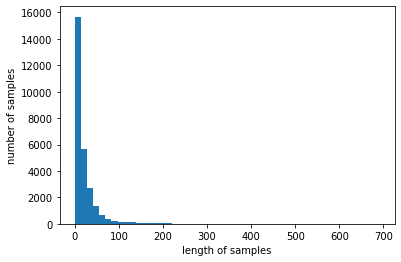

In [ ]:
import matplotlib.pyplot as plt

print('문서의 최대 길이 :',max(len(l) for l in X_train))
print('문서의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%\
          (max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 150
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 150 이하인 샘플의 비율: 99.04159198156344


In [ ]:
from tensorflow.keras.preprocessing import sequence

print('시퀀스 패딩(sample * time)')
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)
print('X_train 크기 :',X_train.shape)
print('X_test 크기 : ', X_test.shape)

시퀀스 패딩(sample * time)
X_train 크기 : (27337, 150)
X_test 크기 :  (6835, 150)


## CNN(Conv1D) 사용하기

Conv1D는 sequence 모델과 자연어 처리(Natural Language Processing, NLP)에서 주로 사용한다.

In [ ]:
# 원래 층
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 256))
model.add(Dropout(0.3))

model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         2664448   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 256)         196864    
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                        

In [ ]:
# # 변형 층
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
# from tensorflow.keras.models import load_model

# model = Sequential()
# model.add(Embedding(input_dim = vocab_size, output_dim = 256))
# model.add(Dropout(0.2))

# model.add(Conv1D(256, 3, padding='valid', activation='relu'))
# model.add(Conv1D(128, 3, padding='valid', activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(3, activation='softmax'))

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['acc'])

# model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 검증 데이터 손실(val_loss)가 증가하면, 과적합 징후이므로
# 검증 데이터 손실이 5회 증가하면 학습을 조기 종료(Early Stopping)합니다.
es = EarlyStopping(monitor='val_loss',
                   mode='min', verbose=1, patience=5)

# ModelCheckpoint를 사용하여 검증 데이터의 
# 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.
mc = ModelCheckpoint('best_model_CNN.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=20,
                    validation_split = 0.2, 
                    callbacks=[es, mc])

Epoch 1/20
684/684 [==============================] - ETA: 0s - loss: 0.6969 - acc: 0.7211
Epoch 1: val_acc improved from -inf to 0.76225, saving model to best_model_CNN.h5
684/684 [==============================] - 15s 8ms/step - loss: 0.6969 - acc: 0.7211 - val_loss: 0.6045 - val_acc: 0.7623
Epoch 2/20
678/684 [============================>.] - ETA: 0s - loss: 0.5027 - acc: 0.8062
Epoch 2: val_acc improved from 0.76225 to 0.76865, saving model to best_model_CNN.h5
684/684 [==============================] - 4s 7ms/step - loss: 0.5030 - acc: 0.8061 - val_loss: 0.5988 - val_acc: 0.7687
Epoch 3/20
683/684 [============================>.] - ETA: 0s - loss: 0.3544 - acc: 0.8665
Epoch 3: val_acc did not improve from 0.76865
684/684 [==============================] - 4s 6ms/step - loss: 0.3545 - acc: 0.8665 - val_loss: 0.6916 - val_acc: 0.7515
Epoch 4/20
678/684 [============================>.] - ETA: 0s - loss: 0.2363 - acc: 0.9147
Epoch 4: val_acc did not improve from 0.76865
684/684 [====

In [ ]:
loaded_model = load_model('best_model_CNN.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

214/214 [==============================] - 1s 3ms/step - loss: 0.5945 - acc: 0.7704

 테스트 정확도: 0.7704


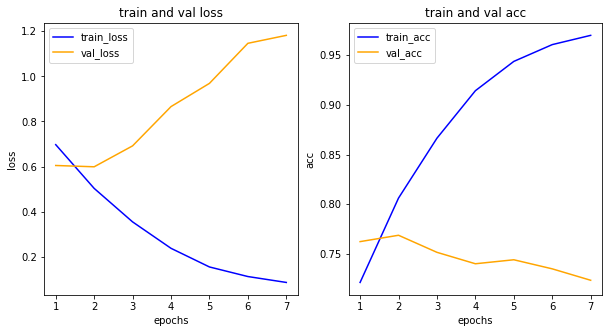

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
loaded_model_CNN = load_model('best_model_CNN.h5')
comment_label = ['부정','긍정','중립']

def sentiment_predict_CNN(new_sentence):
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model_CNN.predict(pad_new) # 예측
  maximum = np.argmax(score)
  
  print(f'해당 리뷰는 {comment_label[maximum]}입니다.')


In [ ]:
sentiment_predict_CNN('갤럭시 탭쪽에서는 워낙 독보적이시라 믿고 보게 되네요')

해당 리뷰는 긍정입니다.


In [ ]:
sentiment_predict_CNN('노캔이 생각보단 안좋지만 그래도 갤럭시 사용자에겐 애어팟보다 나은 선택일듯 고로 가격도 적당한거같음')

해당 리뷰는 부정입니다.


In [ ]:
sentiment_predict_CNN('에어팟 프로는 음질이 그렇게 좋진 않네 고민이다 근데 확실히 노켄은 인정한다')

해당 리뷰는 중립입니다.


In [ ]:
sentiment_predict_CNN('진짜 프로 넘 좋아 저는 개인적으로 에어팟 프로 적극 추천 드려요 디자인도 이쁘고 진짜 미침')

해당 리뷰는 부정입니다.


In [ ]:
sentiment_predict_CNN('이번 모델 진짜 개별로 무조건 거르고 딴거 산다')

해당 리뷰는 부정입니다.


In [ ]:
sentiment_predict_CNN('다음거까지 존버한다')

해당 리뷰는 긍정입니다.


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
loaded_model_CNN = load_model('best_model_CNN.h5')
comment_label = ['부정','긍정','중립']

def sentiment_predict_CNN2(new_sentence):
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model_CNN.predict(pad_new) # 예측
  maximum = np.argmax(score)
  per = int(np.max(score) * 100)
  
  print(f'해당 리뷰는 {per}%의 비율로 {comment_label[maximum]}입니다.')

In [ ]:
sentiment_predict_CNN2('에어팟 프로는 음질이 그렇게 좋진 않네 고민이다 근데 확실히 노켄은 인정한다')

해당 리뷰는 49%의 비율로 중립입니다.


In [ ]:
sentiment_predict_CNN2('싸게 잘 샀어요그래도 카메라 화질은 좀 아쉬워요')

해당 리뷰는 52%의 비율로 긍정입니다.


In [ ]:
sentiment_predict_CNN2('노켄만 있었다면 완벽했을텐데')

해당 리뷰는 39%의 비율로 중립입니다.


In [ ]:
sentiment_predict_CNN2('아 노켄때메 프로로 넘어갈까 고민이다')

해당 리뷰는 49%의 비율로 긍정입니다.


In [ ]:
sentiment_predict_CNN2('아이폰은 불편하고 비싸지만 디자인때문에 삽니다')

해당 리뷰는 61%의 비율로 긍정입니다.


## Multi-Kernel 1D CNN

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 128
dropout_ratio = (0.5, 0.8)
num_filters = 128
hidden_units = 128

In [ ]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_ratio[0])(z)

In [ ]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)  

In [ ]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z)
z = Dense(hidden_units, activation="relu")(z)
model_output = Dense(3, activation="softmax")(z)

model = Model(model_input, model_output)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_multi_model_CNN.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.fit(X_train, y_train, 
          batch_size=64, 
          epochs=20, 
          validation_split=0.2, 
          verbose=2, 
          callbacks=[es, mc])

Epoch 1/20

Epoch 1: val_acc improved from -inf to 0.74506, saving model to best_multi_model_CNN.h5
342/342 - 5s - loss: 0.8281 - acc: 0.6476 - val_loss: 0.6688 - val_acc: 0.7451 - 5s/epoch - 13ms/step
Epoch 2/20

Epoch 2: val_acc improved from 0.74506 to 0.76042, saving model to best_multi_model_CNN.h5
342/342 - 3s - loss: 0.6468 - acc: 0.7518 - val_loss: 0.6335 - val_acc: 0.7604 - 3s/epoch - 8ms/step
Epoch 3/20

Epoch 3: val_acc improved from 0.76042 to 0.76408, saving model to best_multi_model_CNN.h5
342/342 - 3s - loss: 0.5734 - acc: 0.7792 - val_loss: 0.6203 - val_acc: 0.7641 - 3s/epoch - 9ms/step
Epoch 4/20

Epoch 4: val_acc did not improve from 0.76408
342/342 - 3s - loss: 0.5216 - acc: 0.7965 - val_loss: 0.6149 - val_acc: 0.7637 - 3s/epoch - 9ms/step
Epoch 5/20

Epoch 5: val_acc did not improve from 0.76408
342/342 - 3s - loss: 0.4699 - acc: 0.8174 - val_loss: 0.6236 - val_acc: 0.7632 - 3s/epoch - 8ms/step
Epoch 6/20

Epoch 6: val_acc did not improve from 0.76408
342/342 - 3s -

In [ ]:
loaded_model = load_model('best_multi_model_CNN.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

214/214 [==============================] - 1s 3ms/step - loss: 0.6208 - acc: 0.7595

 테스트 정확도: 0.7595


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
loaded_best_multi_model_CNN = load_model('best_multi_model_CNN.h5')
comment_label = ['부정','긍정','중립']

def sentiment_predict_CNN3(new_sentence):
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model_CNN.predict(pad_new) # 예측
  maximum = np.argmax(score)
  per = int(np.max(score) * 100)
  
  print(f'해당 리뷰는 {per}%의 비율로 {comment_label[maximum]}입니다.')

In [ ]:
sentiment_predict_CNN3('갤럭시 탭쪽에서는 워낙 독보적이시라 믿고 보게 되네요')

해당 리뷰는 85%의 비율로 긍정입니다.


In [ ]:
sentiment_predict_CNN3('지금 사봤자 다음 세대 존버해야하는거면 조금 기다렸다가 사야겠다 아 고민된다')

해당 리뷰는 50%의 비율로 긍정입니다.


In [ ]:
sentiment_predict_CNN3('배터리가 최대 단점이긴 한데 그거 외에는 저는 너어어어어무 만족해요 손목 나갈 것 같음을 느끼고 난 후 무조건 작고 가벼운 거 사리라 했던 차에 색상도 핑크라니')

해당 리뷰는 40%의 비율로 중립입니다.


In [ ]:
sentiment_predict_CNN3('화면 크기 매우 마음에 듭니다 다만 CPU 나 GPU 성능이 S7 에 비해서 크게 증가 한게 아니라서 아쉽네요 S펜도 점점더 개선 되어서 좋아지면 더 좋겠어요')

해당 리뷰는 75%의 비율로 긍정입니다.


## CNN-LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, MaxPooling1D, Dropout, Conv1D, LSTM, GlobalMaxPooling1D, Dense, Activation
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 128))
model.add(Dropout(0.2))

model.add(Conv1D(256, 3, padding='same', strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, recurrent_dropout=0, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1332224   
                                                                 
 dropout_4 (Dropout)         (None, None, 128)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 256)         98560     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 256)        0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                82176     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 검증 데이터 손실(val_loss)가 증가하면, 과적합 징후이므로
# 검증 데이터 손실이 5회 증가하면 학습을 조기 종료(Early Stopping)합니다.
es = EarlyStopping(monitor='val_loss',
                   mode='min', verbose=1, patience=5)

# ModelCheckpoint를 사용하여 검증 데이터의 
# 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.
mc = ModelCheckpoint('best_model_CNN_LSTM.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=20,
                    validation_split = 0.2, 
                    callbacks=[es, mc])

Epoch 1/20
684/684 [==============================] - ETA: 0s - loss: 0.6660 - accuracy: 0.7335
Epoch 1: val_accuracy improved from -inf to 0.76756, saving model to best_model_CNN_LSTM.h5
684/684 [==============================] - 10s 10ms/step - loss: 0.6660 - accuracy: 0.7335 - val_loss: 0.6080 - val_accuracy: 0.7676
Epoch 2/20
683/684 [============================>.] - ETA: 0s - loss: 0.4829 - accuracy: 0.8136
Epoch 2: val_accuracy did not improve from 0.76756
684/684 [==============================] - 6s 9ms/step - loss: 0.4828 - accuracy: 0.8136 - val_loss: 0.5999 - val_accuracy: 0.7646
Epoch 3/20
683/684 [============================>.] - ETA: 0s - loss: 0.3744 - accuracy: 0.8602
Epoch 3: val_accuracy did not improve from 0.76756
684/684 [==============================] - 6s 9ms/step - loss: 0.3743 - accuracy: 0.8602 - val_loss: 0.6485 - val_accuracy: 0.7560
Epoch 4/20
679/684 [============================>.] - ETA: 0s - loss: 0.2833 - accuracy: 0.8947
Epoch 4: val_accuracy did n

In [ ]:
loaded_model = load_model('best_model_CNN_LSTM.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

214/214 [==============================] - 1s 4ms/step - loss: 0.6011 - accuracy: 0.7646

 테스트 정확도: 0.7646


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
loaded_model_CNN_LSTM = load_model('best_model_CNN_LSTM.h5')
comment_label = ['부정','긍정','중립']

def sentiment_predict_CNN_LSTM(new_sentence):
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model_CNN.predict(pad_new) # 예측
  maximum = np.argmax(score)
  per = int(np.max(score) * 100)
  
  print(f'해당 리뷰는 {per}%의 비율로 {comment_label[maximum]}입니다.')

In [ ]:
sentiment_predict_CNN_LSTM('애플은 팬톤컬러를 디자인에 잘 활용하는 것 같은데 삼성은 조금 부족한 느낌이 많이 들어요ㅜㅜ')

해당 리뷰는 53%의 비율로 긍정입니다.


In [ ]:
sentiment_predict_CNN_LSTM('벌써 뇌이징이 됐나… 카메라 예뻐 보이네')

해당 리뷰는 48%의 비율로 긍정입니다.


In [ ]:
sentiment_predict_CNN_LSTM('매년 색깔만 다르게 칠해서 출시하는 아이폰......변화가 없..')

해당 리뷰는 72%의 비율로 부정입니다.


In [ ]:
sentiment_predict_CNN_LSTM('마샬은 참 이쁘긴한데 정가 주고 사기에는 아깝다는 생각이 드네요.')

해당 리뷰는 64%의 비율로 부정입니다.


## 성능 테스트

In [ ]:
from google.colab import files
myfile = files.upload()

Saving 테스트 리뷰 150개.xlsx to 테스트 리뷰 150개 (1).xlsx


In [ ]:
import pandas as pd
test_df = pd.read_excel('/content/테스트 리뷰 150개.xlsx') 
test_df = test_df[['label','comment']]
test_df = test_df.dropna()
test_df

,label,comment
0,1,오~ 확실히 개인적인 취향으로 B&O가 제일 예쁘네요 ㅋㅋ 맘에 쏙 들어요
1,0,쫒겨나기 딱이고 이동성 최악이고 민폐라는 이미지를 각인시키는 1등공신스피커네요 이런...
2,0,"제품 강력 비추합니다. 개인적으로 보스를 좋아해서 휴대용 스피커, 이어셋, 헤드셋을..."
3,1,사운드스틱4 만족스럽게 쓰고 있습니다 ㅋㅋ 모니터 양 옆에 두고 쓰기엔 참 좋더라구...
4,2,블루투스가 없는 치명적인 단점이 있지만 아이폰이나 아이패드 있으면 에어플레이로 블루...
...,...,...
145,1,맥세이프로 충전할 때 뜨는 애니메이션 효과가 은근히 매력적이네요. 충전되고 있다는 ...
146,2,약 6개월 정도 사용 중인데 좋아요. 근데 케이스 대신 전신필름을 사용하는데 필름에...
147,1,자석으로 공중에 띄운다는게 엄청 좋은 방식이네 디자인 좋고 활용성 좋고
148,2,사용중인데 가격도 저렴하고 나쁘지 않은 듯 합니다. 물론 모니터의 무게나 크기 등에...


In [ ]:
def Datapredict(test_df):
  Pos = []
  Neg = []
  Mid = []
  k = len(test_df['comment'])
  review_label = ['0','1','2']
  for i in range(k):
    new_sentence = test_df['comment'][i]
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopword]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = sequence.pad_sequences(encoded, maxlen = max_len)
    score = loaded_model_CNN_LSTM.predict(pad_new) 
    maximum = np.argmax(score)
    label = review_label[maximum]
    if label == '0':
      Neg.append(0)
    elif label == '1':
      Pos.append(1)
    else:
      Mid.append(2)
  print(f'이 기기의 긍정 비율은 {int((len(Pos)/k)*100)}입니다')
  print(f'이 기기의 부정 비율은 {int((len(Neg)/k)*100)}입니다')
  print(f'이 기기의 중립 비율은 {int((len(Mid)/k)*100)}입니다')

In [ ]:
Datapredict(test_df)

이 기기의 긍정 비율은 34입니다
이 기기의 부정 비율은 64입니다
이 기기의 중립 비율은 1입니다
